In [127]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np


In [104]:
os.chdir(r'G:\공유 드라이브\SicParvisMagna\데이터\코로나_매출')
df_1 = pd.read_csv('5~6월_매출_확진자.csv')
df_1.columns = ['index', '장기점', '성서점', '상인점', '3지점 합계', '달서확진자']
df_1.index = df_1['index']
del df_1['index']
df_1

,장기점,성서점,상인점,3지점 합계,달서확진자
index,,,,,
2021-05-01,"1,122,000","3,826,000","2,224,000",7172000,0
2021-05-02,"1,130,000","3,642,500","1,874,500",6647000,0
2021-05-03,"1,508,000","1,423,500","1,235,000",4166500,1
2021-05-04,"1,304,000","3,416,000","1,901,500",6621500,1
2021-05-05,"928,500","2,795,000","2,019,000",5742500,2
...,...,...,...,...,...
2021-06-26,"1,240,500","3,967,000","2,045,500",7253000,8
2021-06-27,"1,299,500","3,109,500","1,656,000",6065000,2
2021-06-28,"948,000","2,203,000","1,809,500",4960500,2


In [105]:
jang = [int(a.replace(',', '')) for a in df_1['장기점']]
seong = [int(b.replace(',', '')) for b in df_1['성서점']]
sang = [int(c.replace(',', '')) for c in df_1['상인점']]
df_1['장기점'] = jang
df_1['성서점'] = seong
df_1['상인점'] = sang
df_1['3지점 평균'] = [round(a/3, 2) for a in df_1['3지점 합계']]
df_1

,장기점,성서점,상인점,3지점 합계,달서확진자,3지점 평균
index,,,,,,
2021-05-01,1122000,3826000,2224000,7172000,0,2390666.67
2021-05-02,1130000,3642500,1874500,6647000,0,2215666.67
2021-05-03,1508000,1423500,1235000,4166500,1,1388833.33
2021-05-04,1304000,3416000,1901500,6621500,1,2207166.67
2021-05-05,928500,2795000,2019000,5742500,2,1914166.67
...,...,...,...,...,...,...
2021-06-26,1240500,3967000,2045500,7253000,8,2417666.67
2021-06-27,1299500,3109500,1656000,6065000,2,2021666.67
2021-06-28,948000,2203000,1809500,4960500,2,1653500.00


In [142]:
x = df_1['달서확진자']
y = df_1['3지점 평균']

In [143]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [144]:
LR = LinearRegression()
LR.fit(x_train.values.reshape(-1, 1), y_train)

LinearRegression()

In [145]:
LR.coef_

array([-16487.44576084])

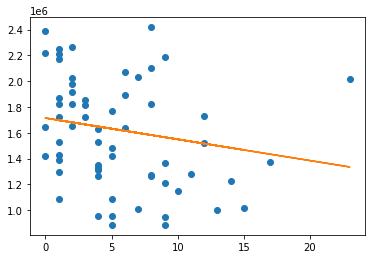

In [146]:
plt.plot(x, y, 'o')
plt.plot(x, LR.predict(x.values.reshape(-1,1)))
plt.show()

In [150]:
y_prediction =  LR.predict(x_test.values.reshape(-1, 1))
y_prediction

array([1714133.38745453, 1697645.9416937 , 1631696.15865035,
       1549258.92984617, 1598721.26712868, 1681158.49593286,
       1466821.70104198, 1697645.9416937 , 1648183.60441119,
       1565746.375607  , 1532771.48408533, 1648183.60441119,
       1631696.15865035])

In [151]:
score = r2_score(y_test, y_prediction)
print('r2 socre is',score)
print('mean_sqrd_error is==',mean_squared_error(y_test, y_prediction))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test, y_prediction)))

r2 socre is 0.0019720696044259745
mean_sqrd_error is== 171290990042.55225
root_mean_squared error of is== 413873.1569485417


In [157]:
np.sqrt(mean_squared_error(y_test, y_prediction))/(sum(y)/len(y))

0.2605859586012102